In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
#from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#print(train_data)
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data.Sex) #Male as 1, Female as 0
test_data['Sex'] = le.transform(test_data.Sex)       #Male as 1, Female as 0
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
test_data.Age = test_data.Age.fillna(test_data.Age.mean())
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

train_ids = train_data['PassengerId']
test_ids = test_data['PassengerId']

train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))

train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode())


train_data = train_data.drop(columns=['PassengerId', 'Name','Cabin', 'Ticket'])
test_data = test_data.drop(columns=['PassengerId', 'Name','Cabin', 'Ticket'])

df_survived = train_data.Survived
train_data = train_data.drop(columns=['Survived'])
###train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
###test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))
train_data.head()

##77% of Train Data contains NULL values for Cabin (687) ##
##78% of Test Data contains NULL values for Cabin (327) ##
#####Decided to Drop Cabin Column due to insufficient data

##19% of Train Data contains NULL values for Age (177) ##
##20% of Test Data contains NULL values for Age (86) ##
#####Decided to replace Null Values with the average passanger age

#0.2% of Train Data contains NULL values for Embarked (2) ##
#####Decided to replace Null Embarked with the mode of Embarked

#0.2% of Test Data contains NULL values for Fare (1) ##
#####Decided to replace the 1 Null fare with the average fare

#####################################################################
####Competition Rules Dictate No Rows dropped from Test Data#########
#####################################################################

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [4]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [5]:
train_data.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
print(train_data.shape)
print(test_data.shape)

(891, 7)
(418, 7)


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [10]:
df_survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

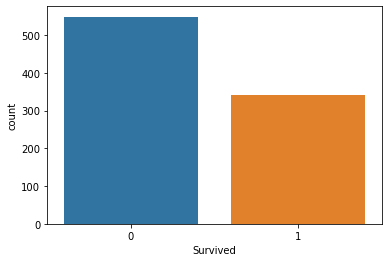

In [11]:
sns.countplot(df_survived)

In [12]:
cm = sns.light_palette("green", as_cmap=True)
corr = train_data.corr()
corr.style.set_caption('Colormaps, with a caption.').background_gradient(cmap=cm)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


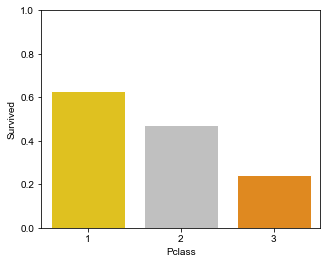

In [13]:
plt.figure(figsize=(5,4))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(train_data.Pclass, df_survived, palette=["gold", "silver", "darkorange"], ci=None)
#sns.lineplot(train_data.Pclass, train_data.Survived)

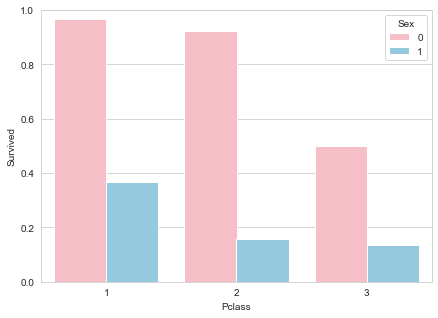

In [14]:
plt.figure(figsize=(7,5))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
sns.barplot(x=train_data.Pclass, y=df_survived, hue=train_data.Sex, palette=["lightpink", "skyblue"], ci=None)


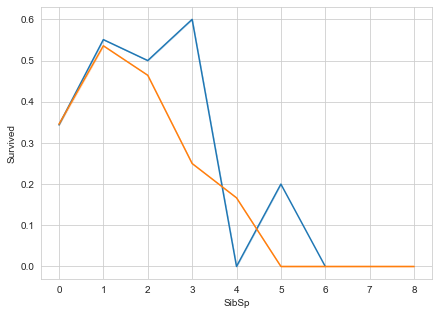

In [15]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.lineplot(x=train_data.Parch,y=df_survived, ci=0)
sns.lineplot(x=train_data.SibSp,y=df_survived, ci=0)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_data, df_survived, test_size=0.25, random_state=0)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
test_transformed = sc.transform(test_data)

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
prediction = knn.predict(test_transformed)
print(prediction)

[1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1]


In [40]:
print(knn.score(X_test, y_test))

0.7533632286995515


In [51]:
test_data.shape

(418, 7)

In [74]:
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [79]:
pred_test_rfc = rfc.predict(test_data)
print(pred_test_rfc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [80]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       139
           1       0.84      0.73      0.78        84

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

[[127  12]
 [ 23  61]]


In [83]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [84]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       139
           1       0.76      0.68      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223

[[121  18]
 [ 27  57]]


In [85]:
mlpc = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1500, random_state=0)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [86]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       139
           1       0.81      0.69      0.74        84

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223

[[125  14]
 [ 26  58]]


In [87]:
print(pred_mlpc)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0]


In [88]:
pred_test_mlpc = mlpc.predict(test_data)
print(pred_test_mlpc)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0]


In [89]:
solution = test_data.drop(columns=['Pclass', 'Sex','Age', 'SibSp', 'Parch','Fare', 'Embarked'])
pred_test_mlpc.size

418

In [93]:
test_ids.shape

(418,)

In [94]:
df = pd.DataFrame()

In [95]:
df['PassengerId'] = test_ids

In [96]:
df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [97]:
df.shape

(418, 1)

In [98]:
df['Survived'] = pred_test_mlpc

In [99]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [100]:
print(df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [103]:
df.to_csv('out.csv', index=False)

In [105]:
df2 = pd.DataFrame()
df2['PassengerId'] = test_ids
df2['Survived'] = prediction

In [106]:
print(df2)

     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         1
414         1306         1
415         1307         1
416         1308         1
417         1309         1

[418 rows x 2 columns]


In [107]:
df2.to_csv('out_knn.csv', index=False)

In [108]:
df3 = pd.DataFrame()
df3['PassengerId'] = test_ids
df3['Survived'] = pred_test_rfc

In [110]:
df3.to_csv('out_RFC.csv', index=False)